# Gradient Boosting Decision Trees
Gradient boosting is also an ensamble learning method. Compared to random forest which generates trees sort of randomly, gradient boosting generated trees in a iterative way. Specifically, a new tree is generated to fit the **residuals** (data-prediction) from the previous tree. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [2]:
# generate the trajector
nsample = 400
X = np.linspace(0,100,nsample)
X = X[:,np.newaxis]
y = np.zeros(nsample)
idx = (X<10).ravel()
y[idx] = 5 + np.random.normal(0,0.1,(y[idx].size))
idx = np.logical_and(X>=10,X<30).ravel()
y[idx] = 2 + np.random.normal(0,0.1,(y[idx].size))
idx = np.logical_and(X>=30,X<60).ravel()
y[idx] = 3 + np.random.normal(0,0.1,(y[idx].size))
idx = np.logical_and(X>=60,X<101).ravel()
y[idx] = 4.5 + np.random.normal(0,1,(y[idx].size))

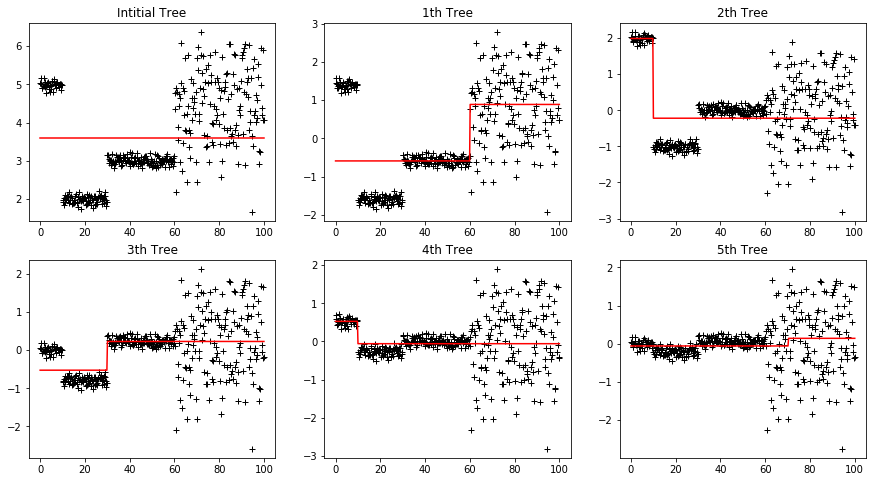

In [4]:
clf_gb = GradientBoostingRegressor(n_estimators=100,learning_rate=1,max_depth=1)
clf_gb.fit(X,y)
y_pred_gb = clf_gb.predict(X)

plt.figure(figsize=(15,8))

clf_tree = clf_gb.init_
y_pred = clf_tree.predict(X).flatten()
plt.subplot(2,3,1)
plt.plot(X,y,'k+')
plt.plot(X,y_pred,'r-')
plt.title('Intitial Tree')

y_resd = y - y_pred

for i in np.arange(1,6,1):
    clf_tree = clf_gb.estimators_[i-1,0]
    y_pred = clf_tree.predict(X)
    
    plt.subplot(2,3,i+1)
    plt.plot(X,y_resd,'k+')
    plt.plot(X,y_pred,'r-')
    plt.title('{}th Tree'.format(i))
    
    y_resd = y_resd - y_pred
plt.show()

## XGBoost and LightGBM

XGBoost and LightGBM are both specific implementations of Gradient Boosting.

They are much faster than traditional gradient boosting method implemented by scikit-learn. However, they are more sensitive to overfit the data so suggested to be used only for large dataset, especially the LightGBM. In this section, we apply them to a small dataset for the purpose on learning the methods and test some parameteres often used to tune the model.

One big difference is they both grow **leaf-based** trees while traditional gradient boosting grow **level-based** trees.

Website: https://xgboost.readthedocs.io/en/latest/, https://lightgbm.readthedocs.io/en/latest/

### Tuning parameters for XGBoost

**min_child_weight [default=1]**
+ Defines the minimum sum of weights of all observations required in a child.
+ This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
+ Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
+ Too high values can lead to under-fitting hence, it should be tuned using CV.

**max_depth [default=6]**
+ The maximum depth of a tree, same as GBM.
+ Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
+ Should be tuned using CV.
+ Typical values: 3-10

**gamma [default=0]**
+ A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
+ Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

**subsample [default=1]**
+ Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
+ Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
+ Typical values: 0.5-1

**colsample_bytree [default=1]**
+ Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
+ Typical values: 0.5-1

**reg_lambda [default=1]**
+ L2 regularization term on weights (analogous to Ridge regression)
+ This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.

**reg_alpha [default=0]**
+ L1 regularization term on weight (analogous to Lasso regression)
+ Can be used in case of very high dimensionality so that the algorithm runs faster when implemented


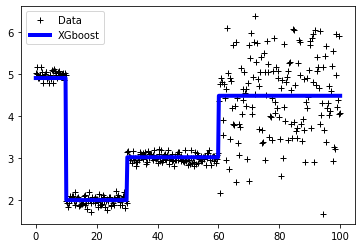

In [144]:
clf_xgb = XGBRegressor(learning_rate=1,max_depth=6,gamma=10)
clf_xgb.fit(X,y)
y_pred_xgb = clf_xgb.predict(X)

plt.figure(figsize=(6,4))
plt.plot(X,y,'k+')
plt.plot(X,y_pred_xgb,'b-',linewidth=4)
plt.legend(('Data','XGboost'))
plt.show()


### Tuning parameters for LightGBM


**num_leaves**:the number of leaf nodes to use. Having a large number of leaves will improve accuracy, but will also lead to overfitting.

**min_child_samples**: the minimum number of samples (data) to group into a leaf. The parameter can greatly assist with overfitting: larger sample sizes per leaf will reduce overfitting (but may lead to under-fitting).

**max_depth**: controls the depth of the tree explicitly. Shallower trees reduce overfitting.

**max_bin**: the maximum numbers of bins that feature values are bucketed in. A smaller max_bin reduces overfitting.

**min_child_weight**: the minimum sum hessian for a leaf. In conjuction with min_child_samples, larger values reduce overfitting.

**subsample**: enables bagging (subsampling) of the training data. Smaller fractions reduce overfitting.

**colsample_bytree**: controls the subsampling of features used for training (as opposed to subsampling the actual training data in the case of bagging). Smaller fractions reduce overfitting.

**lambda_l1** and **lambda_l2**: controls L1 and L2 regularization.

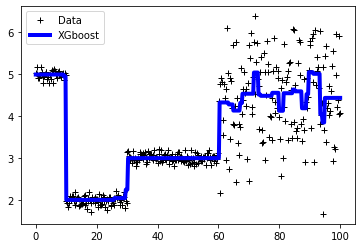

In [145]:
clf_lgb = LGBMRegressor(learning_rate=1,max_depth=10,num_leaves=2)
clf_lgb.fit(X,y)
y_pred_lgb = clf_lgb.predict(X)

plt.figure(figsize=(6,4))
plt.plot(X,y,'k+')
plt.plot(X,y_pred_lgb,'b-',linewidth=4)
plt.legend(('Data','XGboost'))
plt.show()